In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import KFold
from collections import Counter

# آ )

<div dir=rtl>


In [2]:
x=pd.read_csv('/content/BBBP.csv')

In [3]:
x

,num,name,p_np,smiles
0,1,Propanolol,1,[Cl].CC(C)NCC(O)COc1cccc2ccccc12
1,2,Terbutylchlorambucil,1,C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2,3,40730,1,c12c3c(N4CCN(C)CC4)c(F)cc1c(c(C(O)=O)cn2C(C)CO...
3,4,24,1,C1CCN(CC1)Cc1cccc(c1)OCCCNC(=O)C
4,5,cloxacillin,1,Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
...,...,...,...,...
2045,2049,licostinel,1,C1=C(Cl)C(=C(C2=C1NC(=O)C(N2)=O)[N+](=O)[O-])Cl
2046,2050,ademetionine(adenosyl-methionine),1,[C@H]3([N]2C1=C(C(=NC=N1)N)N=C2)[C@@H]([C@@H](...
2047,2051,mesocarb,1,[O+]1=N[N](C=C1[N-]C(NC2=CC=CC=C2)=O)C(CC3=CC=...
2048,2052,tofisoline,1,C1=C(OC)C(=CC2=C1C(=[N+](C(=C2CC)C)[NH-])C3=CC...


In [4]:
elements = ['Ac', 'Ag', 'Al', 'Am', 'Ar', 'As', 'At', 'Au', 'B', 'Ba', 'Be', 'Bh', 'Bi', 'Bk', 'Br', 'C', 'Ca', 'Cd', 'Ce', 'Cf', 'Cl', 'Cm', 'Cn', 'Co', 'Cr', 'Cs', 'Cu', 'Db', 'Ds', 'Dy', 'Er', 'Es', 'Eu', 'F', 'Fe', 'Fl', 'Fm', 'Fr', 'Ga', 'Gd', 'Ge', 'H', 'He', 'Hf', 'Hg', 'Ho', 'Hs', 'I', 'In', 'Ir', 'K', 'Kr', 'La', 'Li', 'Lr', 'Lu', 'Lv', 'Mc', 'Md', 'Mg', 'Mn', 'Mo', 'Mt', 'N', 'Na', 'Nb', 'Nd', 'Ne', 'Nh', 'Ni', 'No', 'Np', 'O', 'Og', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pm', 'Po', 'Pr', 'Pt', 'Pu', 'Ra', 'Rb', 'Re', 'Rf', 'Rg', 'Rh', 'Rn', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Sg', 'Si', 'Sm', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Te', 'Th', 'Ti', 'Tl', 'Tm', 'Ts', 'U', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn', 'Zr']
def count_characters(smiles_list):
    uniqe_characters = set()
    characters=[]

    len_smiles=[]
    for smiles in smiles_list:
        characters_in_smiles =[]
        i = 0
        while i < len(smiles):
            if i < len(smiles) - 1 and smiles[i:i+2] in elements:
                characters_in_smiles.append(smiles[i:i+2])
                i += 2
            elif i < len(smiles) - 1 and smiles[i:i+2] == '@@':
                characters_in_smiles.append(smiles[i:i+2])
                i += 2
            else:
                characters_in_smiles.append(smiles[i])
                i += 1

        length=len(characters_in_smiles)
        len_smiles.append(length)

        characters.append(characters_in_smiles)
        uniqe_characters.update(characters_in_smiles)

    return uniqe_characters,characters,len_smiles


In [5]:
uniqe_characters,characters,len_smiles = count_characters(x['smiles'])
x['characters']=characters
x['len_smiles']=len_smiles
data=x[['p_np','characters','len_smiles']]

In [6]:
data

,p_np,characters,len_smiles
0,1,"[[, Cl, ], ., C, C, (, C, ), N, C, C, (, O, ),...",31
1,1,"[C, (, =, O, ), (, O, C, (, C, ), (, C, ), C, ...",38
2,1,"[c, 1, 2, c, 3, c, (, N, 4, C, C, N, (, C, ), ...",50
3,1,"[C, 1, C, C, N, (, C, C, 1, ), C, c, 1, c, c, ...",32
4,1,"[C, c, 1, o, n, c, (, c, 2, c, c, c, c, c, 2, ...",64
...,...,...,...
2045,1,"[C, 1, =, C, (, Cl, ), C, (, =, C, (, C, 2, =,...",45
2046,1,"[[, C, @, H, ], 3, (, [, N, ], 2, C, 1, =, C, ...",84
2047,1,"[[, O, +, ], 1, =, N, [, N, ], (, C, =, C, 1, ...",53
2048,1,"[C, 1, =, C, (, O, C, ), C, (, =, C, C, 2, =, ...",63


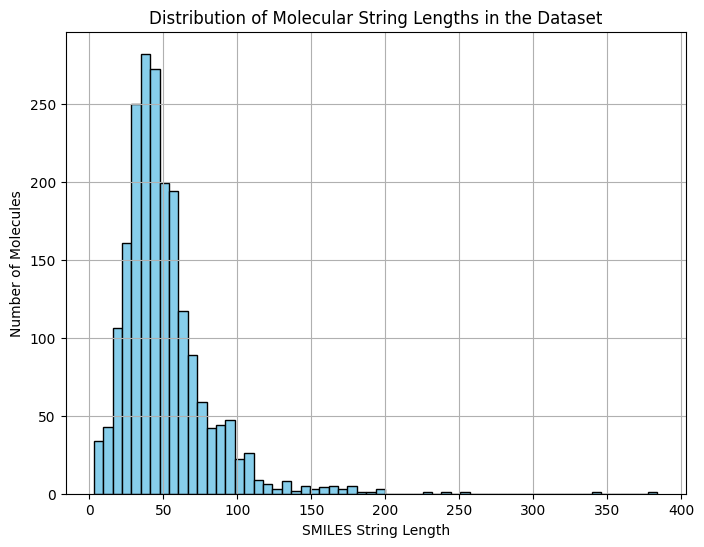

Mean length of SMILES strings: 50.48439024390244
Median length of SMILES strings: 45.0
Minimum length of SMILES strings: 3
Maximum length of SMILES strings: 384


In [7]:
plt.figure(figsize=(8, 6))
plt.hist(data['len_smiles'], bins=60, color='skyblue', edgecolor='black')
plt.xlabel('SMILES String Length')
plt.ylabel('Number of Molecules')
plt.title('Distribution of Molecular String Lengths in the Dataset')
plt.grid(True)
plt.show()

mean_length = data['len_smiles'].mean()
median_length = data['len_smiles'].median()
min_length = data['len_smiles'].min()
max_length = data['len_smiles'].max()

print(f"Mean length of SMILES strings: {mean_length}")
print(f"Median length of SMILES strings: {median_length}")
print(f"Minimum length of SMILES strings: {min_length}")
print(f"Maximum length of SMILES strings: {max_length}")

In [9]:
all_tokens = [token for sublist in data['characters'] for token in sublist]

token_counter = Counter(all_tokens)

unique_tokens_count = len(token_counter)
print(f"Total number of tokens: {len(all_tokens)}")
print(f"Number of unique tokens: {unique_tokens_count}")

print("\nTop most common tokens respectively:")
for token, frequency in token_counter.most_common():
    print(f"{token}: {frequency}")


Total number of tokens: 103493
Number of unique tokens: 43

Top most common tokens respectively:
C: 29759
(: 10491
): 10491
=: 8034
c: 6874
O: 6208
1: 4128
N: 3933
[: 3479
]: 3479
2: 3370
3: 2553
H: 2392
@: 1692
4: 1438
@@: 1251
Cl: 618
F: 509
n: 491
5: 454
S: 447
\: 203
/: 184
.: 163
6: 124
-: 123
+: 121
s: 72
Sc: 63
7: 56
#: 53
Br: 51
o: 49
8: 28
Cn: 24
%: 24
Na: 21
9: 16
P: 11
0: 8
I: 6
Ca: 1
B: 1


# ب

<div dir=rtl>


In [10]:
max_token_count = 0
for string in data['characters']:
    token_count = len(string)
    if token_count > max_token_count:
        max_token_count = token_count
print(f"The maximum number of tokens among the strings is: {max_token_count}.")


The maximum number of tokens among the strings is: 384.


<div dir='rtl'>

پدینگ را در ابتدای هر بردار اضافه میکنیم

In [12]:
char_to_index = {char: i for i, char in enumerate(uniqe_characters)}

max_length = 384
num_characters = 43

one_hot_matrices = []

for smiles in data['characters']:
    one_hot_matrix = np.zeros((num_characters, max_length))

    start_index = max(0, max_length - len(smiles))

    for i, char in enumerate(smiles[:max_length]):
        index = char_to_index[char]
        one_hot_matrix[index, i + start_index] = 1

    one_hot_matrices.append(one_hot_matrix)

In [47]:
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=100):
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y.view(-1, 1))
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            predicted_classes = (outputs >= 0.5).float()
            correct_train += (predicted_classes == batch_y.view(-1, 1)).sum().item()
            total_train += batch_y.size(0)

        epoch_loss = total_loss / len(train_loader)
        accuracy = correct_train / total_train * 100

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%")

def evaluate_model(model, test_loader, criterion, device):
    model.eval()
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            predicted_classes = (outputs >= 0.5).float()
            correct_test += (predicted_classes == batch_y.view(-1, 1)).sum().item()
            total_test += batch_y.size(0)

    test_accuracy = correct_test / total_test * 100
    print(f"Test Accuracy: {test_accuracy:.2f}%")
    return test_accuracy


In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


y_data = data['p_np'].values
X_data = np.array(one_hot_matrices)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

batch_size = 64
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [15]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(43 * 384, 128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.2)
        self.output = nn.Linear(128, 1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.output(x)
        return torch.sigmoid(x)

In [59]:
model1 = NeuralNetwork().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.001)

train_model(model1, train_loader, criterion, optimizer, device, num_epochs=50)
evaluate_model(model1, test_loader, criterion, device)

Epoch [50/50], Loss: 0.0018, Accuracy: 100.00%
Test Accuracy: 86.10%


86.09756097560975

# ج

In [43]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,dropout=0.4, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
        self.relu=nn.ReLU()

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.relu(out[:, -1, :])
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [61]:
input_size = 384
hidden_size = 256
num_layers = 2
output_size = 1

model2 = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)

criterion=nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)

train_model(model2, train_loader, criterion, optimizer, device, num_epochs=100)

evaluate_model(model2, test_loader, criterion, device)

Epoch [100/100], Loss: 0.0024, Accuracy: 99.94%
Test Accuracy: 87.80%


87.8048780487805

# د

In [45]:
class BiLSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(BiLSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bilstm = nn.LSTM(input_size, hidden_size, num_layers,dropout=0.4, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.relu = nn.ReLU()
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        out, _ = self.bilstm((x))
        out = self.relu(out[:, -1, :])
        out = self.fc(out)
        out = self.sigmoid(out)
        return out

In [55]:
input_size = 384
hidden_size = 256
num_layers = 2
output_size = 1

model3 = BiLSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
criterion=nn.BCELoss()
optimizer = optim.Adam(model3.parameters(), lr=0.001)

train_model(model3, train_loader, criterion, optimizer, device, num_epochs=100)

evaluate_model(model3, test_loader, criterion, device)

Epoch [100/100], Loss: 0.0001, Accuracy: 100.00%
Test Accuracy: 87.32%


87.3170731707317

# ه

In [48]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X_data)):
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    batch_size = 64
    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    model1 = NeuralNetwork().to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model1.parameters(), lr=0.001)

    train_model(model1, train_loader, criterion, optimizer, device, num_epochs=100)

    accuracy = evaluate_model(model1, test_loader, criterion, device)
    fold_accuracies.append(accuracy)

average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Test Accuracy across 5 folds: {average_accuracy:.2f}%")

Epoch [100/100], Loss: 0.0007, Accuracy: 99.94%
Test Accuracy: 83.41%
Epoch [100/100], Loss: 0.0010, Accuracy: 99.94%
Test Accuracy: 86.10%
Epoch [100/100], Loss: 0.0005, Accuracy: 100.00%
Test Accuracy: 84.63%
Epoch [100/100], Loss: 0.0005, Accuracy: 100.00%
Test Accuracy: 85.85%
Epoch [100/100], Loss: 0.0003, Accuracy: 100.00%
Test Accuracy: 86.59%

Average Test Accuracy across 5 folds: 85.32%


In [49]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X_data)):
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    batch_size = 64
    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    input_size = 384
    hidden_size = 256
    num_layers = 2
    output_size = 1

    model2 = LSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model2.parameters(), lr=0.001)

    train_model(model2, train_loader, criterion, optimizer, device, num_epochs=100)

    accuracy = evaluate_model(model2, test_loader, criterion, device)
    fold_accuracies.append(accuracy)

average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Test Accuracy across 5 folds: {average_accuracy:.2f}%")

Epoch [100/100], Loss: 0.0001, Accuracy: 100.00%
Test Accuracy: 83.41%
Epoch [100/100], Loss: 0.0034, Accuracy: 99.94%
Test Accuracy: 84.63%
Epoch [100/100], Loss: 0.0022, Accuracy: 99.94%
Test Accuracy: 85.12%
Epoch [100/100], Loss: 0.0111, Accuracy: 99.70%
Test Accuracy: 84.63%
Epoch [100/100], Loss: 0.0015, Accuracy: 99.94%
Test Accuracy: 86.10%

Average Test Accuracy across 5 folds: 84.78%


In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X_data)):
    X_train, X_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    batch_size = 64
    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    input_size = 384
    hidden_size = 256
    num_layers = 2
    output_size = 1

    model3 = BiLSTMModel(input_size, hidden_size, num_layers, output_size).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model3.parameters(), lr=0.001)

    train_model(model3, train_loader, criterion, optimizer, device, num_epochs=100)

    accuracy = evaluate_model(model3, test_loader, criterion, device)
    fold_accuracies.append(accuracy)

average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Test Accuracy across 5 folds: {average_accuracy:.2f}%")

Epoch [100/100], Loss: 0.0010, Accuracy: 99.94%
Test Accuracy: 81.95%
Epoch [100/100], Loss: 0.0064, Accuracy: 99.88%
Test Accuracy: 80.49%
Epoch [100/100], Loss: 0.0011, Accuracy: 99.94%
Test Accuracy: 84.39%
Epoch [100/100], Loss: 0.0066, Accuracy: 99.88%
Test Accuracy: 84.39%
Epoch [100/100], Loss: 0.0014, Accuracy: 100.00%
Test Accuracy: 85.12%

Average Test Accuracy across 5 folds: 83.27%


## b

<div dir='rtl'>

همانطور که مشاهده می شود عملکرد lstm بهتر از baseline  نیست و همچنین عملکرد bilstm از آن بدتر است.
برای توجیه این رفتار می توان گفت که با توجه به ساختار RNN که ارتباط ترتیبی ورودی ها برایش مهم است این عملکرد منطقی نیست.ولی احتمالا مشکل در تبدیل رشته ها به بردار وان هات و یا چنین چیزی است.
من ابتدا پدینگ ها را در انتهای رشته قرار داده بودم ولی با توجه به اینکه برای رشته های با طول کوچک ممکن است فراموش شود و مدل طی مدت طولانی صفر ببیند پدینگ را به ابتدای آن اضافه کردم و نتایج بالا حاصل شد.


# ز

In [60]:
num_bins = 10
data['bin'] = pd.qcut(data['len_smiles'], q=num_bins, labels=False)

bin_accuracies = {}

for bin_num in range(num_bins):
    bin_data = data[data['bin'] == bin_num]
    char_to_index = {char: i for i, char in enumerate(uniqe_characters)}

    max_length = 384
    num_characters = 43

    one_hot_matrices = []

    for smiles in bin_data['characters']:
        one_hot_matrix = np.zeros((num_characters, max_length))

        for i, char in enumerate(smiles[:max_length]):
            index = char_to_index[char]
            one_hot_matrix[index, i] = 1

        if len(smiles) < max_length:
            one_hot_matrix[0, len(smiles):] = 1

        one_hot_matrices.append(one_hot_matrix)

    y_test = bin_data['p_np'].values
    X_test = np.array(one_hot_matrices)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    batch_size = 64

    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    bin_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    bin_accuracy = evaluate_model(model1, bin_loader, criterion, device)
    bin_accuracies[f'Bin {bin_num + 1}'] = bin_accuracy

    print(f"Accuracy for Bin {bin_num + 1}: {bin_accuracy:.2f}%")

average_accuracy = np.mean(list(bin_accuracies.values()))
print(f"\nAverage Test Accuracy across all bins: {average_accuracy:.2f}%")

<ipython-input-60-49c2e8681d1d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bin'] = pd.qcut(data['len_smiles'], q=num_bins, labels=False)


Test Accuracy: 84.14%
Accuracy for Bin 1: 84.14%
Test Accuracy: 84.58%
Accuracy for Bin 2: 84.58%
Test Accuracy: 88.10%
Accuracy for Bin 3: 88.10%
Test Accuracy: 91.10%
Accuracy for Bin 4: 91.10%
Test Accuracy: 86.09%
Accuracy for Bin 5: 86.09%
Test Accuracy: 82.41%
Accuracy for Bin 6: 82.41%
Test Accuracy: 78.21%
Accuracy for Bin 7: 78.21%
Test Accuracy: 62.80%
Accuracy for Bin 8: 62.80%
Test Accuracy: 50.98%
Accuracy for Bin 9: 50.98%
Test Accuracy: 55.94%
Accuracy for Bin 10: 55.94%

Average Test Accuracy across all bins: 76.43%


In [64]:
input_size = 384
hidden_size = 256
num_layers = 2
output_size = 1

num_bins = 10
data['bin'] = pd.qcut(data['len_smiles'], q=num_bins, labels=False)

bin_accuracies = {}

for bin_num in range(num_bins):
    bin_data = data[data['bin'] == bin_num]
    char_to_index = {char: i for i, char in enumerate(uniqe_characters)}

    max_length = 384
    num_characters = 43

    one_hot_matrices = []

    for smiles in bin_data['characters']:
        one_hot_matrix = np.zeros((num_characters, max_length))

        for i, char in enumerate(smiles[:max_length]):
            index = char_to_index[char]
            one_hot_matrix[index, i] = 1

        if len(smiles) < max_length:
            one_hot_matrix[0, len(smiles):] = 1

        one_hot_matrices.append(one_hot_matrix)

    y_test = bin_data['p_np'].values
    X_test = np.array(one_hot_matrices)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    batch_size = 64

    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    bin_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    bin_accuracy = evaluate_model(model2, bin_loader, criterion, device)
    bin_accuracies[f'Bin {bin_num + 1}'] = bin_accuracy

    print(f"Accuracy for Bin {bin_num + 1}: {bin_accuracy:.2f}%")

average_accuracy = np.mean(list(bin_accuracies.values()))
print(f"\nAverage Test Accuracy across all bins: {average_accuracy:.2f}%")

<ipython-input-64-450cf50ffbaa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bin'] = pd.qcut(data['len_smiles'], q=num_bins, labels=False)


Test Accuracy: 79.74%
Accuracy for Bin 1: 79.74%
Test Accuracy: 64.68%
Accuracy for Bin 2: 64.68%
Test Accuracy: 45.71%
Accuracy for Bin 3: 45.71%
Test Accuracy: 31.94%
Accuracy for Bin 4: 31.94%
Test Accuracy: 26.96%
Accuracy for Bin 5: 26.96%
Test Accuracy: 19.10%
Accuracy for Bin 6: 19.10%
Test Accuracy: 21.79%
Accuracy for Bin 7: 21.79%
Test Accuracy: 29.47%
Accuracy for Bin 8: 29.47%
Test Accuracy: 38.73%
Accuracy for Bin 9: 38.73%
Test Accuracy: 44.06%
Accuracy for Bin 10: 44.06%

Average Test Accuracy across all bins: 40.22%


In [65]:
input_size = 384
hidden_size = 256
num_layers = 2
output_size = 1

num_bins = 10
data['bin'] = pd.qcut(data['len_smiles'], q=num_bins, labels=False)

bin_accuracies = {}

for bin_num in range(num_bins):
    bin_data = data[data['bin'] == bin_num]
    char_to_index = {char: i for i, char in enumerate(uniqe_characters)}

    max_length = 384
    num_characters = 43

    one_hot_matrices = []

    for smiles in bin_data['characters']:
        one_hot_matrix = np.zeros((num_characters, max_length))

        for i, char in enumerate(smiles[:max_length]):
            index = char_to_index[char]
            one_hot_matrix[index, i] = 1

        if len(smiles) < max_length:
            one_hot_matrix[0, len(smiles):] = 1

        one_hot_matrices.append(one_hot_matrix)

    y_test = bin_data['p_np'].values
    X_test = np.array(one_hot_matrices)

    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

    batch_size = 64

    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    bin_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

    bin_accuracy = evaluate_model(model3, bin_loader, criterion, device)
    bin_accuracies[f'Bin {bin_num + 1}'] = bin_accuracy

    print(f"Accuracy for Bin {bin_num + 1}: {bin_accuracy:.2f}%")

average_accuracy = np.mean(list(bin_accuracies.values()))
print(f"\nAverage Test Accuracy across all bins: {average_accuracy:.2f}%")

<ipython-input-65-1aa86a88c0f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bin'] = pd.qcut(data['len_smiles'], q=num_bins, labels=False)


Test Accuracy: 84.14%
Accuracy for Bin 1: 84.14%
Test Accuracy: 77.61%
Accuracy for Bin 2: 77.61%
Test Accuracy: 62.38%
Accuracy for Bin 3: 62.38%
Test Accuracy: 40.31%
Accuracy for Bin 4: 40.31%
Test Accuracy: 35.65%
Accuracy for Bin 5: 35.65%
Test Accuracy: 19.10%
Accuracy for Bin 6: 19.10%
Test Accuracy: 20.11%
Accuracy for Bin 7: 20.11%
Test Accuracy: 31.40%
Accuracy for Bin 8: 31.40%
Test Accuracy: 44.12%
Accuracy for Bin 9: 44.12%
Test Accuracy: 44.55%
Accuracy for Bin 10: 44.55%

Average Test Accuracy across all bins: 45.94%
